In [1]:
import sys
!{sys.executable} -m pip install vaderSentiment

     |████████████████████████████████| 125 kB 7.8 MB/s eta 0:00:01


In [8]:
import sys
!{sys.executable} -m pip install twitter

     |████████████████████████████████| 54 kB 2.2 MB/s eta 0:00:01


### We import vader sentiment library and create an object for polarity analyzer

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

### We import the twitter library for scraping the tweets

In [5]:
import twitter
CONSUMER_KEY = '7gb7WLwSYImRoAjjRRkky5H79'
CONSUMER_SECRET = 'SnqtbAx2rBv7efBIqFj77tnAXqTkkCewmaZQqMFF8SAnouksY9'
OAUTH_TOKEN = '398887985-UWcHW0sKl64aZ6eS99SabTsp4JekdRxRalQeAscl'
OAUTH_TOKEN_SECRET = 'u1EH1MrXVRaM56EXZyDZM9B28VpxNix76vDukizIeTIEo'
auth =  twitter.oauth.OAuth(OAUTH_TOKEN,OAUTH_TOKEN_SECRET,CONSUMER_KEY, CONSUMER_SECRET)
twitter_api = twitter.Twitter(auth=auth)

In [109]:
# We scraped 200 tweets

In [6]:
count = 200
query = ["asian","asians"]
tweets = twitter_api.search.tweets(q=query, count=count, 
   lang='en',tweet_mode="extended")

In [7]:
tweets

{'statuses': [{'created_at': 'Mon May 24 15:24:12 +0000 2021',
   'id': 1396849521355681793,
   'id_str': '1396849521355681793',
   'full_text': "RT @moongirljeong: @GCF_In_Luv @kanaetwt okay but you're a white person telling an Asian what is and isn't okay regarding Asian issue, don'…",
   'truncated': False,
   'display_text_range': [0, 140],
   'entities': {'hashtags': [],
    'symbols': [],
    'user_mentions': [{'screen_name': 'moongirljeong',
      'name': 'Summer Ping☾🥥🍸| Johnny Vincent Stan',
      'id': 1262984816158363648,
      'id_str': '1262984816158363648',
      'indices': [3, 17]}],
    'urls': []},
   'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
   'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
   'in_reply_to_status_id': None,
   'in_reply_to_status_id_str': None,
   'in_reply_to_user_id': None,
   'in_reply_to_user_id_str': None,
   'in_reply_to_screen_name': None,
   'user': {'id': 1065730129614

In [9]:
type(tweets['statuses'])

list

In [26]:
tweetsWithSent = []
for t in tweets['statuses']:
   text = (t['full_text'])
   ps = analyzer.polarity_scores(text)
   tweetsWithSent.append({'text':text, 'compound':ps['compound']})

### Areas of no bars indicate neutral tweets

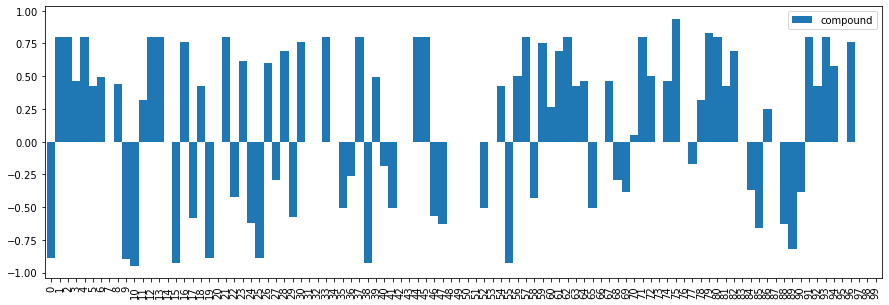

In [27]:
import pandas as pd
tweetdf = pd.DataFrame(tweetsWithSent)
tweetdf.plot.bar(figsize=(15,5),width=1)

In [48]:
tweetdf.head(50)

,text,compound
0,RT @badvibesdni: finally asian racism is being...,-0.8860
1,RT @VABVOX: Pretty sure VP Harris is the most ...,0.7960
2,RT @VABVOX: Pretty sure VP Harris is the most ...,0.7960
3,@MelanieForEdu @RethinkSchools You mean how yo...,0.4660
4,RT @VABVOX: Pretty sure VP Harris is the most ...,0.7960
5,RT @DevTrehan: BREAKING: Sikh brothers Bhups a...,0.4215
6,RT @ejrdavid: The most prominent Asian America...,0.4900
7,What’s the term for people forming asian-ness ...,0.0000
8,RT @cmliwagdixon: Good morning to everyone exc...,0.4404
9,"RT @thatjulieren: Blame, violence, gendered wo...",-0.8957


In [67]:
tweetdf.dtypes

text         object
compound    float64
dtype: object

### We tested the accuracy of sentiment detection by inputting sentences manually to the analyzer object

In [69]:
s1 = "I don't like asian people"
s2 = "I really like the new design of your website!"
s3 = "I’m not sure if I like the new design"
s4 = "The new design is awful!"
s5 = "They’re rapists … some, I assume, are good people"
s6 = "U got some shitty weather Illinois.... I miss texas heat"
s7 = "It’s annoying when a program does the “you sure you want to quit? thing but I’d be lying if I said it hasn’t saved my ass anumber of times"
s8 = "I have made the awful decision to stay up all night. Why? Because I’m stupid as fuck"

In [70]:
vs = analyzer.polarity_scores(s1)
print("{}… {}".format(s1, str(vs)))

vs = analyzer.polarity_scores(s2)
print("{}… {}".format(s2, str(vs)))

vs = analyzer.polarity_scores(s3)
print("{}… {}".format(s3, str(vs)))

vs = analyzer.polarity_scores(s4)
print("{}… {}".format(s4, str(vs)))

vs = analyzer.polarity_scores(s5)
print("{}… {}".format(s5, str(vs)))

vs = analyzer.polarity_scores(s6)
print("{}… {}".format(s6, str(vs)))

vs = analyzer.polarity_scores(s7)
print("{}… {}".format(s7, str(vs)))

vs = analyzer.polarity_scores(s8)
print("{}… {}".format(s8, str(vs)))



I don't like asian people… {'neg': 0.345, 'neu': 0.655, 'pos': 0.0, 'compound': -0.2755}
I really like the new design of your website!… {'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'compound': 0.474}
I’m not sure if I like the new design… {'neg': 0.171, 'neu': 0.611, 'pos': 0.218, 'compound': 0.1376}
The new design is awful!… {'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.5093}
They’re rapists … some, I assume, are good people… {'neg': 0.303, 'neu': 0.493, 'pos': 0.204, 'compound': -0.34}
U got some shitty weather Illinois.... I miss texas heat… {'neg': 0.394, 'neu': 0.606, 'pos': 0.0, 'compound': -0.6369}
It’s annoying when a program does the “you sure you want to quit? thing but I’d be lying if I said it hasn’t saved my ass anumber of times… {'neg': 0.275, 'neu': 0.565, 'pos': 0.16, 'compound': -0.7717}
I have made the awful decision to stay up all night. Why? Because I’m stupid as fuck… {'neg': 0.414, 'neu': 0.586, 'pos': 0.0, 'compound': -0.872}


In [93]:
count = 200
query = ["asian","asians"]
tweets = twitter_api.search.tweets(q=query, count=count, 
   lang='en',tweet_mode="extended")

In [94]:
tweets

{'statuses': [{'created_at': 'Tue Apr 06 16:55:51 +0000 2021',
   'id': 1379477968523829250,
   'id_str': '1379477968523829250',
   'full_text': 'RT @WFDYS: There has been an on-going rise of hate crimes and racism against Asians all over the world. We, the WFDYS, want to assert again…',
   'truncated': False,
   'display_text_range': [0, 140],
   'entities': {'hashtags': [],
    'symbols': [],
    'user_mentions': [{'screen_name': 'WFDYS',
      'name': 'WFDYS',
      'id': 81941265,
      'id_str': '81941265',
      'indices': [3, 9]}],
    'urls': []},
   'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
   'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
   'in_reply_to_status_id': None,
   'in_reply_to_status_id_str': None,
   'in_reply_to_user_id': None,
   'in_reply_to_user_id_str': None,
   'in_reply_to_screen_name': None,
   'user': {'id': 22855589,
    'id_str': '22855589',
    'name': 'Abigail Gorman (She/Her)',
    'screen

In [107]:
tweetsWithSentLoc = []
for t in tweets['statuses']:
   text = (t['full_text'])
   location = (t['user']['location'])
   ps = analyzer.polarity_scores(text)
   tweetsWithSentLoc.append({'text':text, 'compound_sentiment_scores':ps['compound'], 'location':location})

In [112]:
pd.DataFrame(tweetsWithSentLoc).head(50)

,text,compound_sentiment_scores,location
0,RT @WFDYS: There has been an on-going rise of ...,-0.8176,
1,"@jaweedkaleem @latimes "" . .need for white com...",-0.9356,"Los Angeles, CA"
2,@genocidefile @alphabet4726482 @chenweihua He ...,-0.2617,
3,@Garilamb @ginashiii @Afro_Gamers it's not tha...,-0.0572,(he/them)
4,RT @ginashiii: xinyan was never black and will...,-0.4228,
5,RT @chris_notcapn: I’m confused. Are South Asi...,-0.5043,"Nashville, TN"
6,"RT @GoAwayWithJae: ""I never heard anyone use s...",0.0000,"B.C., México 🇲🇽"
7,RT @Toxic_Strike: #boycottgenshinimpact white ...,-0.8934,"Jamestown, North Carolina"
8,@chriswiltrout1 @tommcgillis @mikeisapinecone ...,0.0000,
9,RT @Wiseronenow: @SenWhitehouse @Barryhallphd ...,-0.2500,
